In [70]:
#from read_epi import data
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import pymc as pm
mpl.rcParams['figure.dpi']= 200

In [69]:
data = pd.read_csv("all_data_Brain_GSE50161.csv")
data = data.to_numpy()
N, D = data.shape

In [65]:
sample = data[:,6]
hist = np.histogram(sample, bins=10, density=False)
indices = np.digitize(np.float64(sample), np.float64(hist[1]), right=False)

In [66]:
lam = np.mean(hist[0])
models = [stats.poisson.pmf(hist[0][i], lam) for i in range(len(hist[0]))]

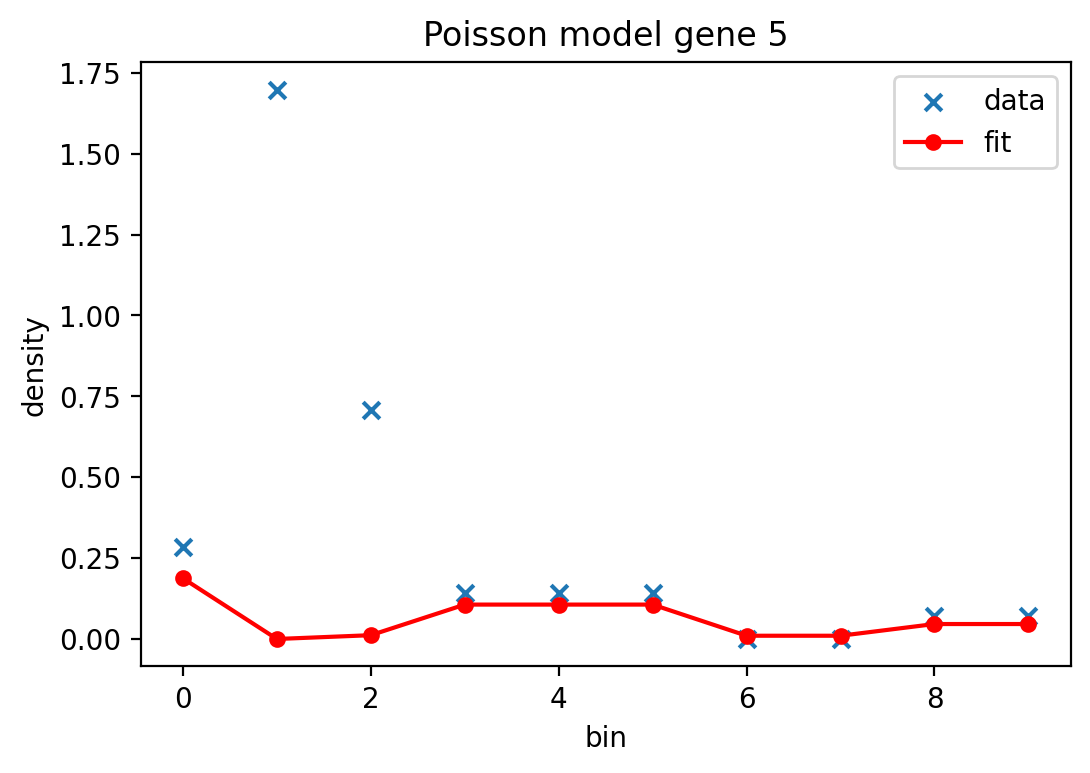

In [67]:
fig, ax = plt.subplots(1,1)
bins = np.arange(len(hist[1]) - 1)
density = np.histogram(sample, bins=hist[1], density=True)[0]
plt.scatter(bins, density, label="data", marker="x")
ax.plot(bins, models, color="red", ms=5, label="fit", marker="o")
plt.xlabel("bin")
plt.ylabel("density")
plt.title("Poisson model gene 5")
plt.legend()

In [8]:
models

[0.0008276572845228969,
 0.006993704054218464,
 0.10993981424841123,
 0.0660539621337744,
 0.04572966609261302,
 0.0660539621337744,
 0.00011493300917401683,
 2.2326067299320745e-05,
 0.0036506854074670964,
 0.0008276572845228969]

In [ ]:
pca = PCA(n_components=2)
pca.fit(data[:,2:])
data_pcaed = pca.transform(data[:,2:])

# first plotting the PCA space
plt.scatter(data_pcaed[:,0], data_pcaed[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Top 2 Principal Components")
#plt.savefig("pca.png")

In [ ]:
# second plotting histogram for PC1
plt.hist(data_pcaed[:,0], color="g")
plt.title("Histogram of PC1")
#plt.savefig("histogram_pc1.png")

In [ ]:
# third plotting histogram for PC2
plt.hist(data_pcaed[:,1], color="purple")
plt.title("Histogram of PC2")
#plt.savefig("histogram_pc2.png")